In [29]:
using LinearAlgebra

In [105]:
H0 = Hermitian([1.0 0.0; 0.0 -1.0])
V(t) = 0.2*sin(10t)*Hermitian([0.0 1.0; 1.0 0.0])

V (generic function with 1 method)

In [3]:
Diagonal([1.0, 2.0, 3.0])

3×3 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅    ⋅ 
  ⋅   2.0   ⋅ 
  ⋅    ⋅   3.0

In [106]:
function calc_Udt_orig(old_Udt::Matrix{ComplexF64},t::Float64, dt::Float64)
    newU = (Matrix(I, 2, 2) - 1.0im*(H0 + V(t))*dt)*old_Udt
    newU = newU/sqrt((newU*newU')[1,1])
    return newU
end

function calc_Udt(old_Udt::Matrix{ComplexF64},t::Float64, dt::Float64)
    Udt = (Matrix(I, 2, 2) - 1.0im*(H0 + V(t))*dt)*old_Udt
    e, vr = eigen(Udt)
    e2, vl = eigen(Udt')
    vl = vl'

    K = vr*(1.0im* Diagonal(log.(e)))*vl
    Kv = Hermitian(K + K')/2
    Udt = exp(-1.0im*Kv)
    return Udt
end

calc_Udt (generic function with 1 method)

In [107]:
T_size = 2000
dt0 = 2pi/10/T_size

0.0003141592653589793

In [108]:
U0 = Matrix{ComplexF64}(I, 2, 2)
U_norm = Matrix{ComplexF64}(I, 2, 2)
for ti in 1:T_size
    U0 = calc_Udt_orig(U0, ti*dt0, dt0)
    U_norm = calc_Udt(U_norm, ti*dt0, dt0)
end
@show (U_norm - U0)
@show U0
@show U_norm
@show U0 * U0'
@show U_norm * U_norm'

U_norm - U0 = ComplexF64[0.19082599969151792 + 0.5845502188092021im 0.024474621301687264 - 2.162209504805553e-6im; -0.024474621301687264 - 2.1622095048055537e-6im 0.1908259996915178 - 0.5845502188092021im]
U0 = ComplexF64[0.8091708420216717 - 0.5870634902035027im -0.024474616093030525 + 7.688927411662575e-6im; 0.024474616093030525 + 7.688927411662575e-6im 0.8091708420216717 + 0.5870634902035027im]
U_norm = ComplexF64[0.9999968417131896 - 0.0025132713943005988im 5.2086567388716905e-9 + 5.526717906857022e-6im; -5.208656738871801e-9 + 5.5267179068570215e-6im 0.9999968417131895 + 0.0025132713943006187im]
U0 * U0' = ComplexF64[1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im]
U_norm * U_norm' = ComplexF64[1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.9999999999999999 + 0.0im]


2×2 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im

In [109]:
β0 = 10.0
ρ0 = Hermitian([exp(-β0*H0[1,1]) 0.0; 0.0 exp(-β0*H0[2,2])])/(exp(-β0*H0[1,1])+exp(-β0*H0[2,2]))

2×2 Hermitian{Float64, Matrix{Float64}}:
 2.06115e-9  0.0
 0.0         1.0

In [110]:
ρ1 = zeros(Float64, 200)
ρ = copy(ρ0)
for nt in 1:200
    ρ = Hermitian(U_norm * ρ * U_norm')
    #ρ = Hermitian(U0 * ρ * U0')
    ρ1[nt] = real(ρ[1,1])
end

In [111]:
function rho2beta(rho)
    return 0.5*log(1/rho-1)
end

rho2beta (generic function with 1 method)

In [112]:
rho2beta(ρ0[1,1])

10.0

In [113]:
ρx = Hermitian(U0 * ρ0 * U0')
rho2beta(real(ρx[1,1]))

3.7098174143928557

In [134]:
ρx = Hermitian(U0 * ρx * U0')
#rho2beta(real(ρx[1,1]))

2×2 Hermitian{ComplexF64, Matrix{ComplexF64}}:
 0.00156343+0.0im        -0.0124232+0.0375053im
 -0.0124232-0.0375053im    0.998437+0.0im

In [39]:
using Plots

In [50]:
βt = rho2beta.(ρ1)
ave = 100
βt_ave = [sum(βt[ave*(n-1)+1:ave*n])/ave for n in 1:div(2000,ave)]
Tt = 1 ./ βt
T_ave = [sum(Tt[ave*(n-1)+1:ave*n])/ave for n in 1:div(2000,ave)]
T_ave2 = 1 ./ βt_ave

20-element Vector{Float64}:
 0.18650105425228822
 0.24141366671314612
 0.25486667774199645
 0.2411051347064455
 0.18397655860823314
 0.18667783528211487
 0.24144170471472806
 0.25486651714865904
 0.241076709863602
 0.18402737021523938
 0.18684989709324573
 0.24146971039585197
 0.2548663296298126
 0.24104825248115527
 0.1839728484698971
 0.18701780791245998
 0.2414976837731312
 0.2548661151854101
 0.24101976254181223
 0.18386871187559375

In [46]:
dTdt_ave = [T_ave[i+1] - T_ave[i] for i in 1:length(T_ave)-1]
dTdt_ave2 = [T_ave2[i+1] - T_ave2[i] for i in 1:length(T_ave2)-1]

19-element Vector{Float64}:
  0.0007679521079886342
  0.00046938536899832073
 -0.00047840555906830673
 -0.0007644994404161221
  6.082250634920072e-6
  0.000768260705267032
  0.00046855548948410153
 -0.0004792263710644562
 -0.0007641762008101516
  7.1019887222245615e-6
  0.0007685680718110266
  0.0004677248584039617
 -0.0004800464143854821
 -0.0007638517370351927
  8.121715440623234e-6
  0.0007688742071272348
  0.0004668934770879485
 -0.0004808656877166584
 -0.0007635260496132723

In [24]:
dTdt = [Tt[i+1] - Tt[i] for i in 1:length(Tt)-1]

1999-element Vector{Float64}:
 0.007405318863964824
 0.0048641137179241956
 0.003727142034133102
 0.0030655065305946055
 0.0026270210118811976
 0.002312536142565755
 0.002074610093127538
 0.0018875135950259248
 0.0017360129539087665
 0.0016104806471638755
 ⋮
 0.000139816789575975
 0.00013611672325086754
 0.00013243174386656786
 0.00012876129071731635
 0.00012510481857555544
 0.00012146179698049875
 0.0001178317095579251
 0.00011421405336800583
 0.00011060833827997163

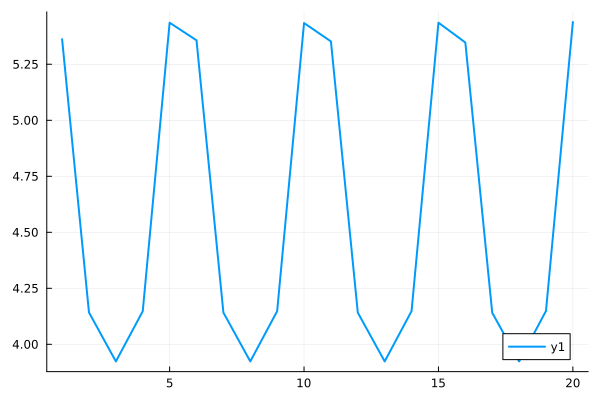

In [51]:
plot(βt_ave, linewidth=2.0)

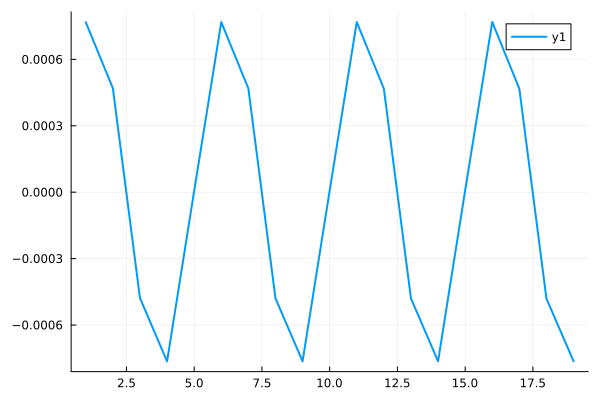

In [52]:
plot(dTdt_ave, linewidth=2.0)

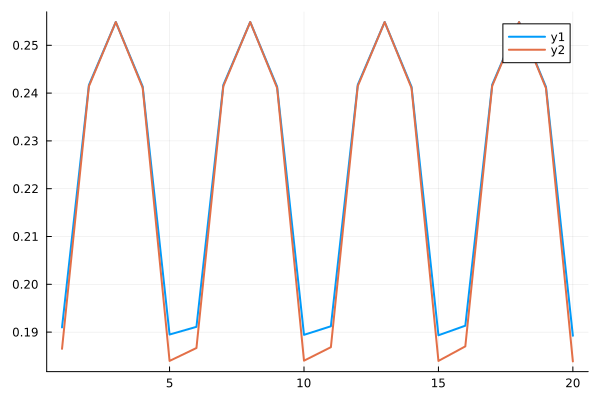

In [53]:
plot(T_ave, linewidth=2.0)
plot!(T_ave2, linewidth=2.0)